In [75]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

import matplotlib.pyplot as plt
%matplotlib inline

## Read in raw file

In [76]:
df = pd.read_excel('./tableau_worldcloud.xlsx', sheet_name='Sheet1')

In [77]:
df.head()

,Unnamed: 0,Job Title,Employer Name,Employer Size,Industry,Location,Sector,Listing Job Title,Country,Company Type,Company Rating,Job Description,Code,Region,Cleaned Description
0,0,Product Manager,HSBC Global Technology (HSBC GLT),-1-0,Banks & Credit Unions,NaN,Finance,"Digital Product Manager, Digital Customer Onbo...",Hong Kong,Company - Private,3.8,some careers grow faster than others. if yo...,HK,Asia,careers grow faster others. rsquo looking care...
1,1,Data Scientist,Harnham,51-200,Staffing & Outsourcing,Charing Cross,Business Services,Data Scientist media,United Kingdom,Company - Private,4.1,data scientist media london pou...,GB,Europe,data scientist media london pound pound + bene...
2,2,Sales,Rentokil Initial,10000--1,Building & Personnel Services,Perai,Business Services,"Territory Manager (Outdoor Sales Consultant), ...",Malaysia,Company - Public,4.4,rentokil initial: rentokil initial is an ...,MY,Asia,rentokil initial: rentokil initial internation...
3,3,Data Scientist,Derbysoft,51-200,IT Services,Barcelona,Information Technology,Data Scientist,Spain,Company - Private,3.8,job title: data scientist business unit:...,ES,Europe,job title: data scientist business unit: marke...
4,4,Business Analyst,TrackTik,51-200,Computer Hardware & Software,Montréal,Information Technology,Business Analyst,Canada,Company - Private,4.2,about tracktik tracktik is a montreal bas...,CA,North America,tracktik tracktik montreal based saas scale co...


In [78]:
df['Job Title'].unique()

array(['Product Manager', 'Data Scientist', 'Sales', 'Business Analyst',
       'Business Intelligence', 'Data Engineer', 'Data Analyst',
       'Software Engineer', 'Machine Learning Engineer', 'Dba',
       'Statistician', 'Research Scientist', 'Applied Scientist',
       'Database Engineer'], dtype=object)

In [79]:
# df_test = df[df['Job Title']=='Data Scientist']
df_test = df

In [82]:
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', str(text))
#     result = re.findall(r'[A-Za-z]', text)
    return " ".join(result)

df_test['only_words']=df_test['Cleaned Description'].apply(lambda x : search_words(x))

In [40]:
text = ' '.join(list(df_test['only_words']))

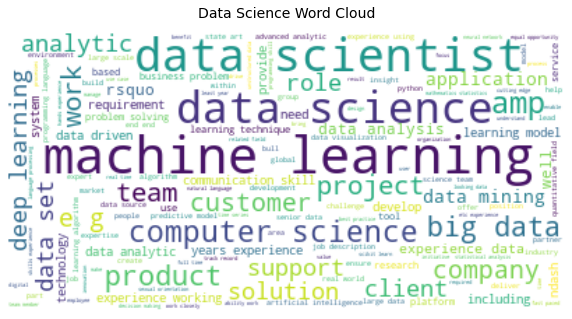

In [43]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')

wordcloud.generate(text, )

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title('Data Science Word Cloud', fontsize=14, pad=15)
plt.imshow(wordcloud, interpolation='bilinear',)
plt.axis("off")

plt.savefig('./wordclouds/data_science.png', bbox_inches='tight')


In [83]:
df_test.head()

,Unnamed: 0,Job Title,Employer Name,Employer Size,Industry,Location,Sector,Listing Job Title,Country,Company Type,Company Rating,Job Description,Code,Region,Cleaned Description,only_words
0,0,Product Manager,HSBC Global Technology (HSBC GLT),-1-0,Banks & Credit Unions,NaN,Finance,"Digital Product Manager, Digital Customer Onbo...",Hong Kong,Company - Private,3.8,some careers grow faster than others. if yo...,HK,Asia,careers grow faster others. rsquo looking care...,careers grow faster others rsquo looking caree...
1,1,Data Scientist,Harnham,51-200,Staffing & Outsourcing,Charing Cross,Business Services,Data Scientist media,United Kingdom,Company - Private,4.1,data scientist media london pou...,GB,Europe,data scientist media london pound pound + bene...,data scientist media london pound pound benefi...
2,2,Sales,Rentokil Initial,10000--1,Building & Personnel Services,Perai,Business Services,"Territory Manager (Outdoor Sales Consultant), ...",Malaysia,Company - Public,4.4,rentokil initial: rentokil initial is an ...,MY,Asia,rentokil initial: rentokil initial internation...,rentokil initial rentokil initial internationa...
3,3,Data Scientist,Derbysoft,51-200,IT Services,Barcelona,Information Technology,Data Scientist,Spain,Company - Private,3.8,job title: data scientist business unit:...,ES,Europe,job title: data scientist business unit: marke...,job title data scientist business unit marketi...
4,4,Business Analyst,TrackTik,51-200,Computer Hardware & Software,Montréal,Information Technology,Business Analyst,Canada,Company - Private,4.2,about tracktik tracktik is a montreal bas...,CA,North America,tracktik tracktik montreal based saas scale co...,tracktik tracktik montreal based saas scale co...


In [72]:
df_skills['only_words']=df['Cleaned Description'].apply(lambda x : search_words(x))

TypeError: expected string or bytes-like object

In [85]:
def get_skills(text, skill):
    text = str(text).lower()
    if text.find(skill) != -1:
        return 1
    else:
        return 0

In [86]:
df_skills=df
skill_list = ['python', 'java', 'c++', 'php', 'ruby', 'perl', 'matlab', 'javascript', 'scala',
             'swift', 'kotlin', 'css', ' r ', 
              'tableau', 'd3', 'sas', 'spotfire', 'excel', 'hadoop', 'hive', 'spark',
             'sql', 'nosql', 'cassandra', 'hbase', 'mongodb', 'deep learning', 'machine learning',
             'cloud']

for skill in skill_list:
    dic = {'python': 'Python', 'java': 'Java', 'c++': 'C/C++', 'php': 'PHP', 'ruby': 'Ruby', 'perl': 'Perl', 
            'matlab':'MATLAB', 'javascript':'Javascript', 'scala':'Scala','swift':'Swift', 'kotlin':'Kotlin', 'css':'CSS', ' r ':'R', 
            'tableau':'Tableau', 'd3':'D3', 'sas':'SAS', 'spotfire':'Spotfire', 'excel':'Excel', 'hadoop':'Hadoop', 'hive':'Hive', 'spark':'Spark',
            'sql':'SQL', 'nosql':'NoSQL', 'cassandra':'Cassandra', 'hbase':'HBase', 'mongodb':'MongoDB', 
            'deep learning':'Deep Learning', 'machine learning':'Machine Learning', 'cloud':'Cloud Computing'}
    print(dic[skill])
    df_skills[dic[skill]] = df_skills['Cleaned Description'].apply(get_skills, args=(skill,))

Python
Java
C/C++
PHP
Ruby
Perl
MATLAB
Javascript
Scala
Swift
Kotlin
CSS
R
Tableau
D3
SAS
Spotfire
Excel
Hadoop
Hive
Spark
SQL
NoSQL
Cassandra
HBase
MongoDB
Deep Learning
Machine Learning
Cloud Computing


In [87]:
df_skills.head()

,Unnamed: 0,Job Title,Employer Name,Employer Size,Industry,Location,Sector,Listing Job Title,Country,Company Type,...,Hive,Spark,SQL,NoSQL,Cassandra,HBase,MongoDB,Deep Learning,Machine Learning,Cloud Computing
0,0,Product Manager,HSBC Global Technology (HSBC GLT),-1-0,Banks & Credit Unions,NaN,Finance,"Digital Product Manager, Digital Customer Onbo...",Hong Kong,Company - Private,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Scientist,Harnham,51-200,Staffing & Outsourcing,Charing Cross,Business Services,Data Scientist media,United Kingdom,Company - Private,...,0,0,1,0,0,0,0,0,1,0
2,2,Sales,Rentokil Initial,10000--1,Building & Personnel Services,Perai,Business Services,"Territory Manager (Outdoor Sales Consultant), ...",Malaysia,Company - Public,...,0,0,0,0,0,0,0,0,0,0
3,3,Data Scientist,Derbysoft,51-200,IT Services,Barcelona,Information Technology,Data Scientist,Spain,Company - Private,...,1,1,1,0,0,0,0,0,1,0
4,4,Business Analyst,TrackTik,51-200,Computer Hardware & Software,Montréal,Information Technology,Business Analyst,Canada,Company - Private,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df_skills.drop(columns=['Unnamed: 0'], inplace=True)

In [98]:
output = df_skills[['Job Title',
       'Country','Region',
       'Python', 'Java', 'C/C++', 'PHP',
       'Ruby', 'Perl', 'MATLAB', 'Javascript', 'Scala', 'Swift', 'Kotlin',
       'CSS', 'R', 'Tableau', 'D3', 'SAS', 'Spotfire', 'Excel', 'Hadoop',
       'Hive', 'Spark', 'SQL', 'NoSQL', 'Cassandra', 'HBase', 'MongoDB',
       'Deep Learning', 'Machine Learning', 'Cloud Computing']]



In [103]:
grouped = output.groupby(['Job Title', 'Country', 'Region']).sum()
grouped.reset_index(inplace=True)

In [104]:
grouped.to_excel('./tableau_skills.xlsx',engine='xlsxwriter', index=False)

In [94]:
df_skills.columns

Index(['Job Title', 'Employer Name', 'Employer Size', 'Industry', 'Location',
       'Sector', 'Listing Job Title', 'Country', 'Company Type',
       'Company Rating', 'Job Description', 'Code', 'Region',
       'Cleaned Description', 'only_words', 'Python', 'Java', 'C/C++', 'PHP',
       'Ruby', 'Perl', 'MATLAB', 'Javascript', 'Scala', 'Swift', 'Kotlin',
       'CSS', 'R', 'Tableau', 'D3', 'SAS', 'Spotfire', 'Excel', 'Hadoop',
       'Hive', 'Spark', 'SQL', 'NoSQL', 'Cassandra', 'HBase', 'MongoDB',
       'Deep Learning', 'Machine Learning', 'Cloud Computing'],
      dtype='object')